In [241]:
library(fgsea)
library(data.table)
library(ggplot2)
library(dplyr)
library(ggpubr)

In [133]:
nuclei_chrom_1904 = read.table(file = '../data/4_dorado_20190429_chrom_well_positioned_genes_score_coverage_window1200.tsv', 
                               header = TRUE, sep = '\t')
nuclei_chrom_1904<- nuclei_chrom_1904[!nuclei_chrom_1904$geneid %>% duplicated(),]

nuclei_chrom_1904_genes<- nuclei_chrom_1904 %>% filter(pearson_cor >= 0.5, coverage >= 22, variation <= 7100) %>% pull(geneid)
# nuclei_chrom_1904_genes<- nuclei_chrom_1904 %>% filter(pearson_cor >= 0.5, coverage >= 0, variation <= 10000) %>% pull(geneid)
length(nuclei_chrom_1904_genes)
nuclei_chrom_1904_genes = list(nuclei_chrom_1904_genes)
names(nuclei_chrom_1904_genes) = 'nuclei_chrom_1904_genes'

rownames(nuclei_chrom_1904)<- nuclei_chrom_1904$geneid

df<- nuclei_chrom_1904 %>% mutate(rank = pearson_cor) %>% arrange(rank) %>% select(rank)
nuclei_chrom_1904_rank<- df$rank
names(nuclei_chrom_1904_rank)<- rownames(df)

[1] 380

In [134]:
nuclei_chrom_2106 = read.table(file = '../data/4_dorado_20210615_chrom_well_positioned_genes_score_coverage_window1200.tsv', header = TRUE, sep = '\t')
nuclei_chrom_2106<- nuclei_chrom_2106[!nuclei_chrom_2106$geneid %>% duplicated(),]
nuclei_chrom_2106_genes<- nuclei_chrom_2106 %>% filter(pearson_cor >= 0.6, coverage >= 29, variation <= 9400) %>% pull(geneid)
# nuclei_chrom_2106_genes<- nuclei_chrom_2106 %>% filter(pearson_cor >= 0.6, coverage >= 0, variation <= 10000) %>% pull(geneid)
length(nuclei_chrom_2106_genes)
nuclei_chrom_2106_genes = list(nuclei_chrom_2106_genes)
names(nuclei_chrom_2106_genes) = 'nuclei_chrom_2106_genes'

rownames(nuclei_chrom_2106)<- nuclei_chrom_2106$geneid
df<- nuclei_chrom_2106 %>% mutate(rank = pearson_cor) %>% arrange(rank) %>% select(rank)

nuclei_chrom_2106_rank<- df$rank
names(nuclei_chrom_2106_rank)<- rownames(df)

[1] 230

In [139]:
sphe_chrom_2205 = read.table(file = '../data/4_dorado_202205_sphe_chrom_well_positioned_genes_score_coverage_window1200.tsv', header = TRUE, sep = '\t')
sphe_chrom_2205<- sphe_chrom_2205[!sphe_chrom_2205$geneid %>% duplicated(),]
sphe_chrom_2205_genes<- sphe_chrom_2205 %>% filter(pearson_cor >= 0.5, coverage >= 16, variation <= 5500) %>% pull(geneid)
length(sphe_chrom_2205_genes)
sphe_chrom_2205_genes = list(sphe_chrom_2205_genes)
names(sphe_chrom_2205_genes) = 'sphe_chrom_2205_genes'

rownames(sphe_chrom_2205)<- sphe_chrom_2205$geneid
df<- sphe_chrom_2205 %>% mutate(rank = pearson_cor) %>% arrange(rank) %>% select(rank)

sphe_chrom_2205_rank<- df$rank
names(sphe_chrom_2205_rank)<- rownames(df)

[1] 57

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.77% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


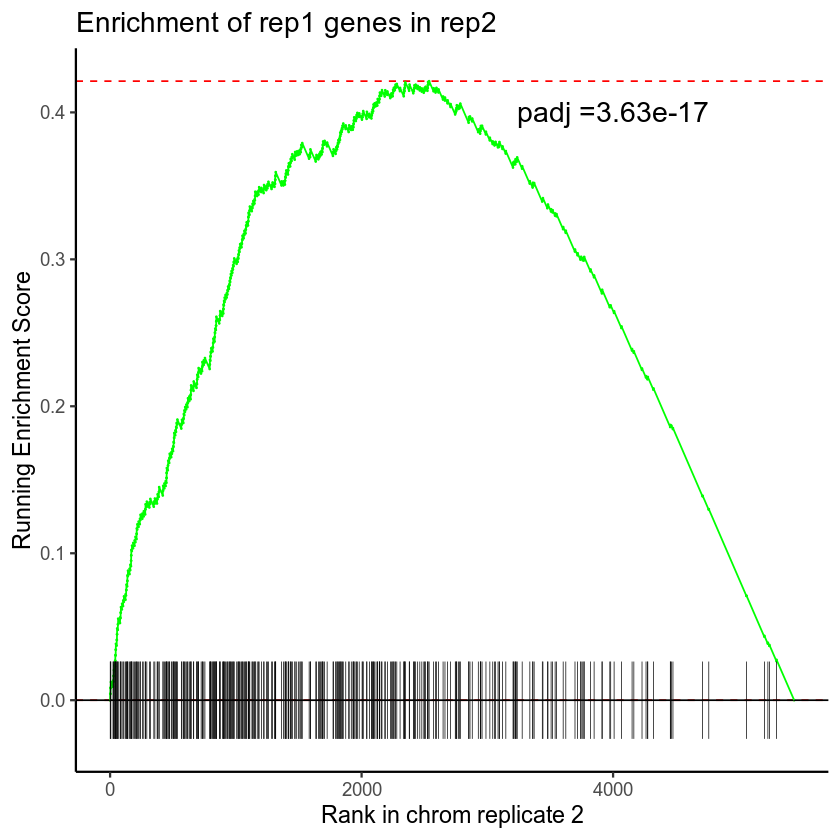

In [137]:
# enrichment of chrom rep1 in rep2
fgseaRes <- fgsea(pathways = nuclei_chrom_1904_genes, 
                  stats    = nuclei_chrom_2106_rank,
                  minSize  = 15,
                  maxSize  = 500)
p<- plotEnrichment(nuclei_chrom_1904_genes[["nuclei_chrom_1904_genes"]], nuclei_chrom_2106_rank) + 
    theme_classic(base_size = 14) +
    labs(x = 'Rank in chrom replicate 2', y = "Running Enrichment Score", title="Enrichment of rep1 genes in rep2") +
    annotate("text", x = 4000, y = 0.4, label = paste0('padj =', format(fgseaRes$padj, scientific = TRUE, digits = 3)), size = 6)
p

ggsave("../data/revision/Revision2_R4C8_fGSEA_rep1_in_rep2_rank.pdf", p, width = 6, height = 4)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.77% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


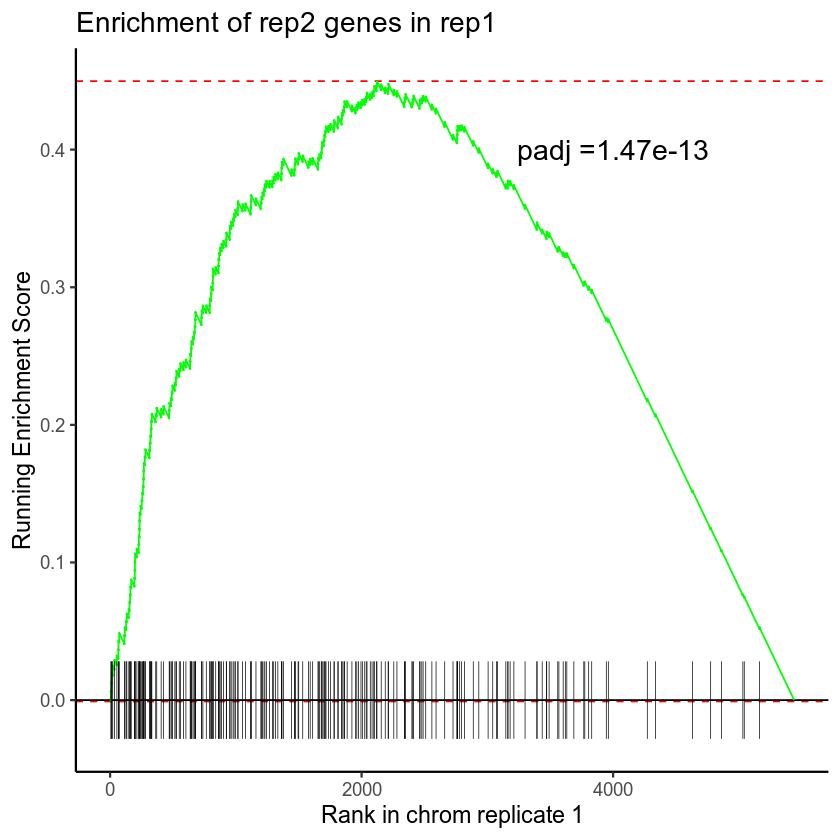

In [138]:
# enrichment of chrom rep2 in rep1
fgseaRes <- fgsea(pathways = nuclei_chrom_2106_genes, 
                  stats    = nuclei_chrom_1904_rank,
                  minSize  = 15,
                  maxSize  = 500)
p<- plotEnrichment(nuclei_chrom_2106_genes[["nuclei_chrom_2106_genes"]], nuclei_chrom_1904_rank) + 
    theme_classic(base_size = 14) +
    labs(x = 'Rank in chrom replicate 1', y = "Running Enrichment Score", title="Enrichment of rep2 genes in rep1") +
    annotate("text", x = 4000, y = 0.4, label = paste0('padj =', format(fgseaRes$padj, scientific = TRUE, digits = 3)), size = 6)
p
ggsave("../data/revision/Revision2_R4C8_fGSEA_rep2_in_rep1_rank.pdf", p, width = 6, height = 4)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.77% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


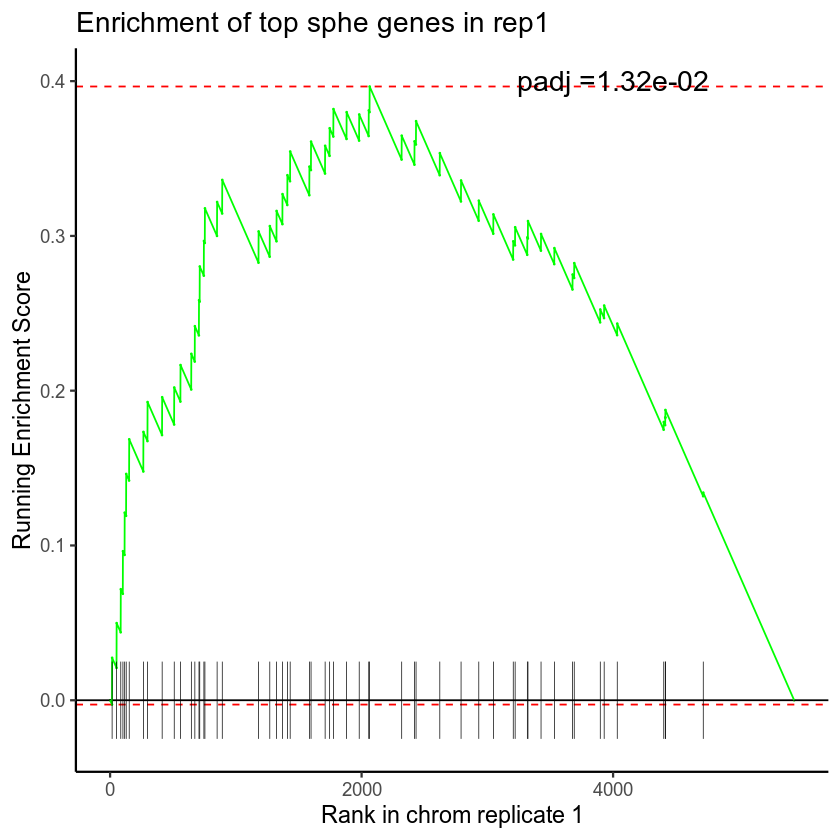

In [142]:
# enrichment of sphe in nuclei rep1
fgseaRes <- fgsea(pathways = sphe_chrom_2205_genes, 
                  stats    = nuclei_chrom_1904_rank,
                  minSize  = 15,
                  maxSize  = 500)

p<- plotEnrichment(sphe_chrom_2205_genes[["sphe_chrom_2205_genes"]], nuclei_chrom_1904_rank) + 
    theme_classic(base_size = 14) +
    labs(x = 'Rank in chrom replicate 1', y = "Running Enrichment Score", title="Enrichment of top sphe genes in rep1") +
    annotate("text", x = 4000, y = 0.4, label = paste0('padj =', format(fgseaRes$padj, scientific = TRUE, digits = 3)), size = 6)
p
ggsave("../data/revision/Revision2_R4C8_fGSEA_sphe_in_rep1_rank.pdf", p, width = 6, height = 4)

In [146]:
nuclei_chrom_1904["GDI1", ]

,geneid,spearman_cor,pearson_cor,pval,coverage,variation,chr,tss,strand
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>
GDI1,GDI1,-0.03578573,0.007088552,0.806,13,6584,chrV,439496,+


In [147]:
nuclei_chrom_2106["GDI1", ]

,geneid,spearman_cor,pearson_cor,pval,coverage,variation,chr,tss,strand
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>
GDI1,GDI1,-0.4126361,-0.4067977,0,25,8498,chrV,439496,+


In [166]:
sphe_well_pos = read.table(file = '../data/4_dorado_202205_sphe_chrom_well_positioned_genes_cov16_cor0.5_var5500.bed', header = FALSE, sep = '\t')
colnames(sphe_well_pos)<- c('chrom', 'start', 'end', 'genename', 'strand')

In [167]:
head(sphe_well_pos)

,chrom,start,end,genename,strand,NA
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>
1,chrX,395971,397171,APS3,0.701,-
2,chrXVI,406029,407229,RPL21B,0.689,+
3,chrXIII,177530,178730,RSE1,0.688,-
4,chrXIII,177824,179024,GSF2,0.681,+
5,chrX,236262,237462,LSB6,0.664,+
6,chrXVI,720061,721261,RDS3,0.652,+


In [168]:
for (gene in sphe_well_pos$genename){
    print(sphe_chrom_2205[gene, c('pearson_cor', 'coverage', 'chr', 'tss')])
    print(nuclei_chrom_1904[gene, c('pearson_cor', 'coverage', 'chr', 'tss')])
    print(nuclei_chrom_2106[gene, c('pearson_cor', 'coverage', 'chr', 'tss')])
}

     pearson_cor coverage  chr    tss
APS3   0.7014502       20 chrX 396571
     pearson_cor coverage  chr    tss
APS3   0.4032769       22 chrX 396571
     pearson_cor coverage  chr    tss
APS3   0.3812953       34 chrX 396571
       pearson_cor coverage    chr    tss
RPL21B   0.6885926       16 chrXVI 406629
       pearson_cor coverage    chr    tss
RPL21B    0.477612       19 chrXVI 406629
       pearson_cor coverage    chr    tss
RPL21B   0.6491353       26 chrXVI 406629
     pearson_cor coverage     chr    tss
RSE1   0.6881471       23 chrXIII 178130
     pearson_cor coverage     chr    tss
RSE1   0.6077069       24 chrXIII 178130
     pearson_cor coverage     chr    tss
RSE1   0.6649123       24 chrXIII 178130
     pearson_cor coverage     chr    tss
GSF2   0.6808077       24 chrXIII 178424
     pearson_cor coverage     chr    tss
GSF2   0.7306755       23 chrXIII 178424
     pearson_cor coverage     chr    tss
GSF2   0.8042397       25 chrXIII 178424
     pearson_cor coverage  c

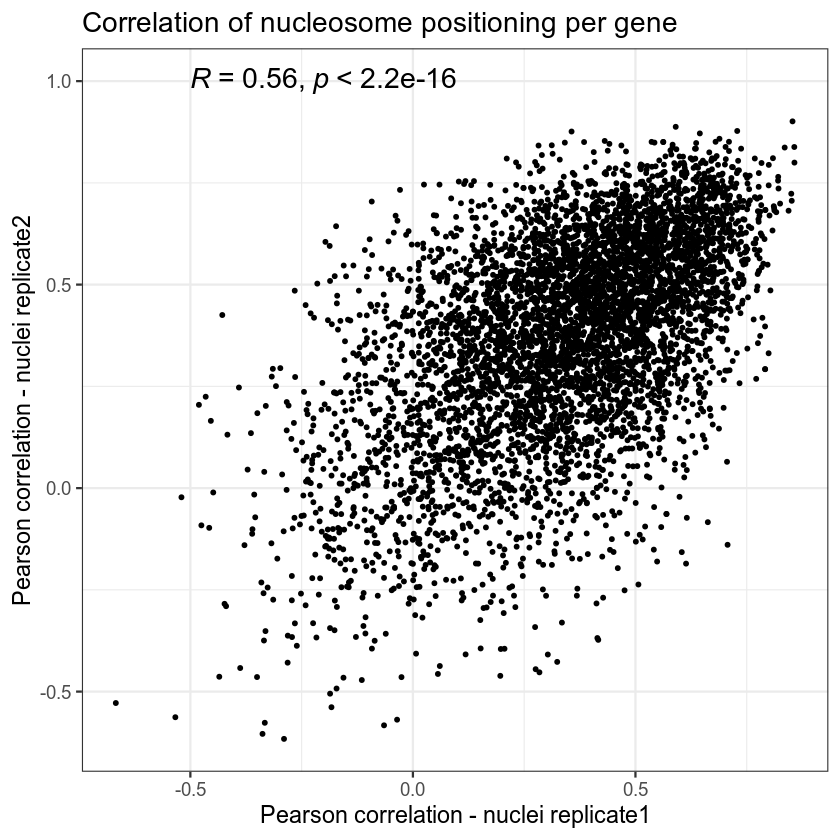

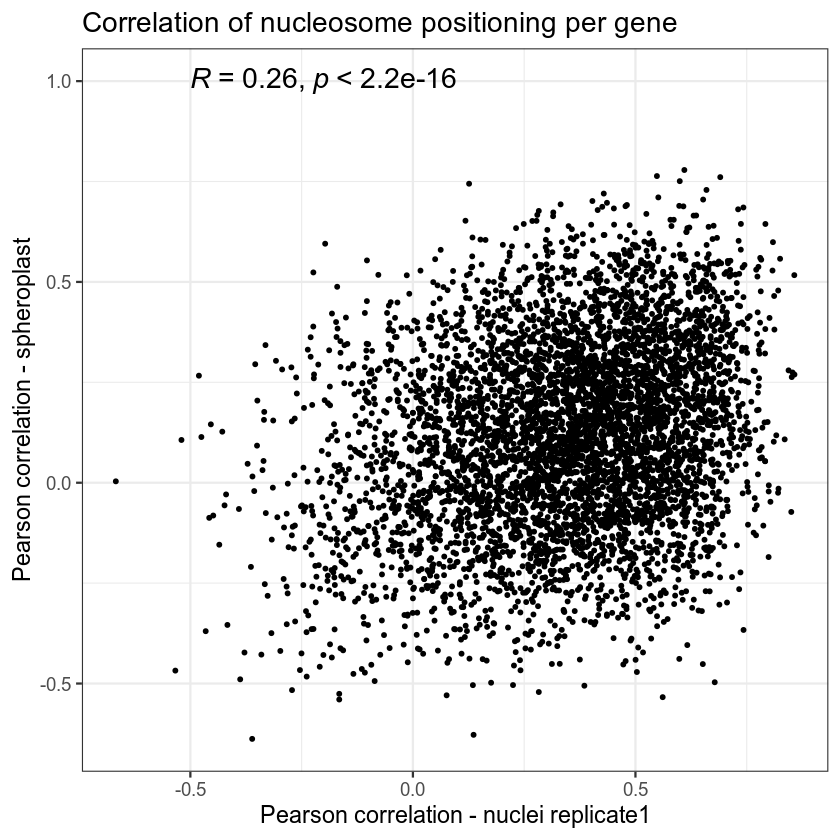

In [250]:
thiscor = cor(nuclei_chrom_1904$pearson_cor, nuclei_chrom_2106$pearson_cor, method = 'pearson')


p1 <- 
    data.frame(sample1 = nuclei_chrom_1904$pearson_cor, sample2 = nuclei_chrom_2106$pearson_cor) %>% 
    ggplot(aes(x = sample1, y = sample2)) +
    geom_point(size=1) +
    theme_bw(base_size = 14) +
     labs(x = 'Pearson correlation - nuclei replicate1', y = 'Pearson correlation - nuclei replicate2', 
          title = 'Correlation of nucleosome positioning per gene') +  
    stat_cor(size =6, method = "pearson", label.x = -0.5, label.y = 1)
p1
ggsave('../data/revision/Revision2_R4C8_pearson_correlation_of_correlation.pdf', p1, width = 6, height = 5)
thiscor = cor(nuclei_chrom_1904$pearson_cor, sphe_chrom_2205$pearson_cor, method = 'pearson')
p2 <- 
    data.frame(sample1 = nuclei_chrom_1904$pearson_cor, sample2 = sphe_chrom_2205$pearson_cor) %>% 
    ggplot(aes(x = sample1, y = sample2)) +
    geom_point(size=1) +
    theme_bw(base_size = 14) +
     labs(x = 'Pearson correlation - nuclei replicate1', y = 'Pearson correlation - spheroplast', 
          title = 'Correlation of nucleosome positioning per gene') +  
    stat_cor(size =6, method = "pearson", label.x = -0.5, label.y = 1)
p2
ggsave('../data/revision/Revision2_R4C8_pearson_correlation_of_correlation_2.pdf', p2, width = 6, height = 5)

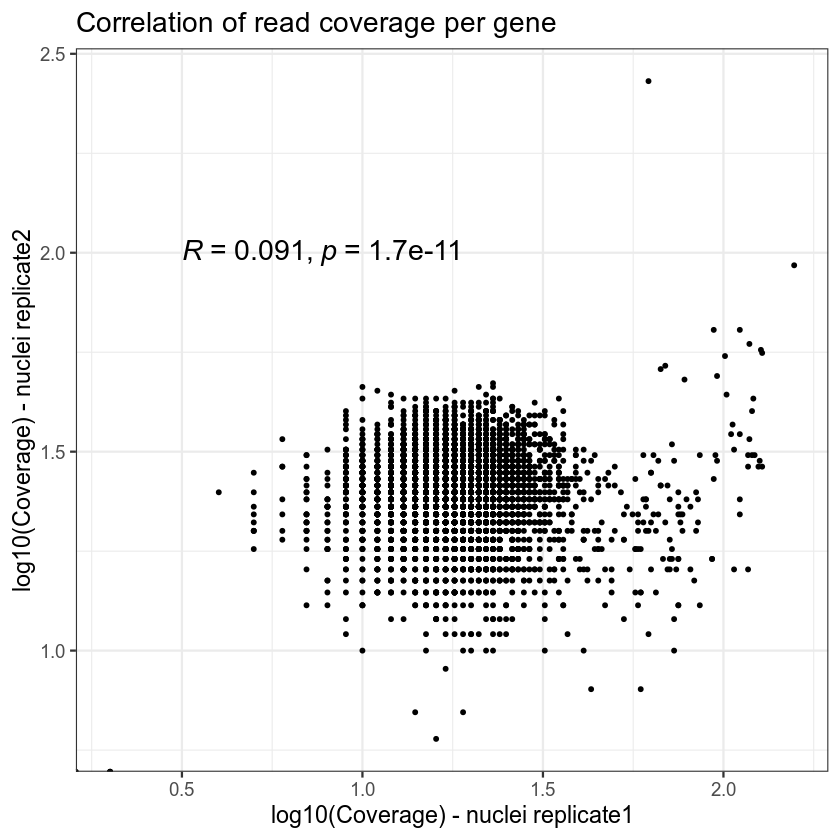

In [252]:
thiscor = cor(nuclei_chrom_1904$coverage, nuclei_chrom_2106$coverage, method = 'pearson')
p <- 
    data.frame(sample1 = log10(nuclei_chrom_1904$coverage), sample2 = log10(nuclei_chrom_2106$coverage)) %>% 
    ggplot(aes(x = sample1, y = sample2)) +
    geom_point(size=1) +
    theme_bw(base_size = 14) +
    labs(x = 'log10(Coverage) - nuclei replicate1', y = 'log10(Coverage) - nuclei replicate2', title = 'Correlation of read coverage per gene') +
    stat_cor(aes(x = nuclei_chrom_1904$coverage, y = nuclei_chrom_2106$coverage), size = 6, method = "pearson", label.x = 0.5, label.y = 2)

p
ggsave('../data/revision/Revision2_R4C8_pearson_correlation.pdf', p, width = 6, height = 5)

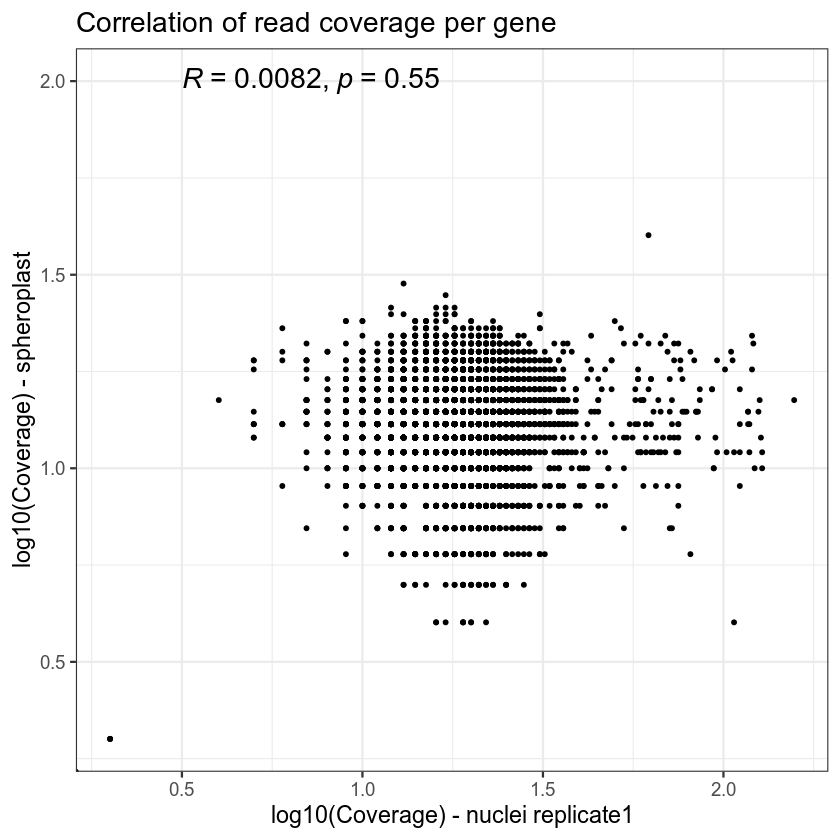

In [254]:
thiscor = cor(nuclei_chrom_1904$coverage, sphe_chrom_2205$coverage, method = 'pearson')
p <- 
    data.frame(sample1 = log10(nuclei_chrom_1904$coverage), sample2 = log10(sphe_chrom_2205$coverage)) %>% 
    ggplot(aes(x = sample1, y = sample2)) +
    geom_point(size=1) +
    theme_bw(base_size = 14) +
    labs(x = 'log10(Coverage) - nuclei replicate1', y = 'log10(Coverage) - spheroplast', title = 'Correlation of read coverage per gene') +
    stat_cor(aes(x = nuclei_chrom_1904$coverage, y = sphe_chrom_2205$coverage), size = 6, method = "pearson", label.x = 0.5, label.y = 2)

p

ggsave('../data/revision/Revision2_R4C8_pearson_correlation_2.pdf', width = 6, height = 5)